# 4.10 Coding Etiquette and Excel Reporting

#### Please note, due to memory constraints we are using a 70% randomised and representative sample of the full data set for our analyses and visualisations. This subet was created in a previous exercise. 

###  Contents:

1. Importing libraries and files

2. Creating profiling variables to look at customer behaviour
    
3. Creating customer profiling visualisations

4. Exporting updated dataframes and charts
    
   ** **

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path
path = r"C:\Users\Natalia\Documents\Instacart Basket Analysis"

In [3]:
#importing previously created high activity data set 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [4]:
#checking output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,age,date_joined,n_dependants,dependants_loc,fam_status,income,region,exclusion_flag
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
4,431534,1,5,4,15,28.0,196,1,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
5,3367565,1,6,2,7,19.0,196,1,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
7,3108588,1,8,1,14,14.0,196,2,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity
8,2295261,1,9,1,16,0.0,196,4,1,both,...,Female,AL,31,2019-02-17,3,Has dependants,married,40423,South,high-activity


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21675811 entries, 1 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int8          
 9   _merge                  category      
 10  product_name            category      
 11  aisle_id                int16         
 12  department_id           int8          
 13  prices                  float32       
 14  price_range_loc         category      
 15  busiest_days            category      
 16  busiest_period_of_day   category      
 17  max_order               int8          
 18  

In [6]:
df.shape

(21675811, 33)

In [7]:
#importing departments data set 
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [8]:
#checking output 
df_deps

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
df_deps.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [10]:
#checking output
df_deps

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 2. Customer Profiling

*The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)*

**What are demographics are we going to be looking at?**
 - Age
 - Income
 - Family status and dependants 


#### 2.1 Age

In [11]:
#checking the variance of ages in our dataset
df['age'].describe()

count    2.167581e+07
mean     4.946941e+01
std      1.848539e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

**Result:** The result of the describe function() is that we have a wide spread of ages, all customers are adults. The minimum age is 18 whilst the maximum is 81 so it makes sense to group the age into three categories:

1. Youth: 18 - 39
2. Midde age: 40 - 64
3. Senior: 65+

In [12]:
#creating age categories

df.loc[(df['age'] >= 18) & (df['age'] < 40), 'age_category'] = 'Youth'
df.loc[(df['age'] >= 40) & (df['age'] < 65), 'age_category'] = 'Middle age'
df.loc[df['age'] >= 65, 'age_category'] = 'Senior'
df['age_category'].value_counts()

Middle age    8473216
Youth         7464859
Senior        5737736
Name: age_category, dtype: int64

In [13]:
#checking shape of dataset
df.shape

(21675811, 34)

#### 2.2 Income

In [14]:
#checking our dataframe for income statistics
df['income'].describe()

count    2.167581e+07
mean     9.967933e+04
std      4.315239e+04
min      2.590300e+04
25%      6.728600e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

**Result:** The results of the describe function tell us that the lowest recorded income is 25,000 USD and the highest is 593,901 USD

Text(0.5, 1.0, 'Income distribution of Instacart Users')

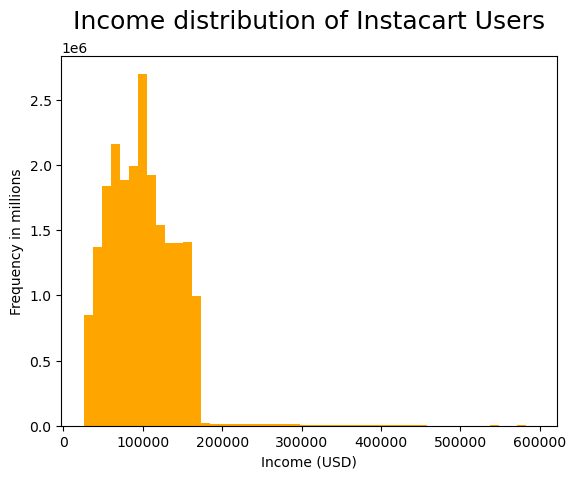

In [15]:
#create an income histogram
hist_income = df['income'].plot.hist(bins =50, color = 'orange')

plt.xlabel('Income (USD)')
plt.ylabel('Frequency in millions')
plt.title('Income distribution of Instacart Users', fontsize = 18, pad=20)

In [16]:
#calculating the income percentiles
quartile_income = list(df['income'].quantile([0.25, 0.5, 0.75]))

In [17]:
#checking results
quartile_income

[67286.0, 96765.0, 128102.0]

**Results:** based on the identified quartiles, we are going to create three income categories so we can analyse the impact of income on purchases: low, mid, and high income. 

In [18]:
# Creating income_category column

df.loc[df['income']< 70000, 'income_flag'] = 'Low'
df.loc[(df['income']>= 70000) & (df['income']< 120000), 'income_flag'] = 'Middle'
df.loc[df['income']>= 120000, 'income_flag'] = 'High'

In [19]:
df['income_flag'].value_counts()

Middle    9284980
High      6425993
Low       5964838
Name: income_flag, dtype: int64

In [20]:
# Drawing a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (df['region'],df['income_flag'], dropna = False)
crosstab_income_region

income_flag,High,Low,Middle
region,,,
Midwest,1532662,1382212,2169193
Northeast,1141239,1041384,1644186
South,2116677,1994497,3105829
West,1635415,1546745,2365772


#### 2.3 Family makeup and Number of Depedants

In a previous exercise we created the column *dependants_loc* which tracked whether or not the customer has any dependants. We can use this data point in conjunction with others to understand more about how having dependants impacts purchasing. 

It's not clear from the data set but dependants can be children or adults, including elderly relevatives, or family members with disabilities. 

In [21]:
#comparing family status with whether they have dependants
family_crosstab = pd.crosstab(df['fam_status'],df['dependants_loc'],dropna = False)

In [22]:
#checking output
family_crosstab

dependants_loc,Has dependants,No dependants
fam_status,,
divorced/widowed,0,1853099
living with parents and siblings,1036805,0
married,15219623,0
single,0,3566284


**Observations:** It appears that only those customers who are married, or live with close family members have dependants. 

#### Creating a profile column that looks at income and family status

In [23]:
#creating profile for "high-income single adult"
df.loc[(df['fam_status'] == 'single') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income single adult'

In [24]:
#creating profile for "mid-income single adult"
df.loc[(df['fam_status'] == 'single') & (df['income']>= 96763) & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income single adult'

In [25]:
#creating profile for "low-income single adult"
df.loc[(df['fam_status'] == 'single') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income single adult'

In [26]:
#creating profile for "high-income married adult"
df.loc[(df['fam_status'] == 'married') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income married adult'

In [27]:
#creating profile for "mid-income married adult"
df.loc[(df['fam_status'] == 'married') & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income married adult'

In [28]:
#creating profile for "low-income married adult"
df.loc[(df['fam_status'] == 'married') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income married adult'

In [29]:
#creating profile for "high-income divorced/widowed adult"
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income divored/widowed adult'

In [30]:
#creating profile for "mid-income divorced/widowed adult"
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income divorced/widowed adult'

In [31]:
#creating profile for "low-income divorced/widowed adult"
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income divorced/widowed adult'

In [32]:
#creating profile for "high-income cohabiting adult"
df.loc[(df['fam_status'] == 'living with parents or siblings') & (df['income_flag'] == 'High'), 'profile_age'] = 'high-income living with family adult'

In [33]:
#creating profile for "mid-income cohabiting adult"
df.loc[(df['fam_status'] == 'living with parents or siblings') & (df['income_flag'] == 'Middle'), 'profile_age'] = 'mid-income living with family adult'

In [34]:
#creating profile for "low-income cohabiting adult"
df.loc[(df['fam_status'] == 'living with parents or siblings') & (df['income_flag'] == 'Low'), 'profile_age'] = 'low-income living with family adult'

In [35]:
# labelling everyone else as "other"
df['profile_age'] = df['profile_age'].fillna('other')

In [36]:
df['profile_age'].value_counts(dropna = False)

mid-income married adult             6479151
high-income married adult            4787784
low-income married adult             3952688
other                                1999613
low-income single adult              1246336
high-income divored/widowed adult     849526
high-income single adult              775930
mid-income divorced/widowed adult     756866
mid-income single adult               581210
low-income divorced/widowed adult     246707
Name: profile_age, dtype: int64

#### Creating a column that looks at income and dependants

In [37]:
#creating profile for "high-income family"
df.loc[(df['dependants_loc'] == 'Has dependants') & (df['income_flag'] == 'High'), 'profile_fam'] = 'high-income family'

In [38]:
#creating profile for "mid-income family"
df.loc[(df['dependants_loc'] == 'Has dependants') & (df['income_flag'] == 'Middle'), 'profile_fam'] = 'mid-income family'

In [39]:
#creating profile for "low-income family"
df.loc[(df['dependants_loc'] == 'Has dependants') & (df['income_flag'] == 'Low'), 'profile_fam'] = 'low-income family'

In [40]:
#creating profile for "high-income no dependants"
df.loc[(df['dependants_loc'] == 'No dependants') & (df['income_flag'] == 'High'), 'profile_fam'] = 'high-income no dependants'

In [41]:
#creating profile for "mid-income no dependants"
df.loc[(df['dependants_loc'] == 'No dependants') & (df['income_flag'] == 'Middle'), 'profile_fam'] = 'mid-income no dependants'

In [42]:
#creating profile for "low-income no dependants"
df.loc[(df['dependants_loc'] == 'No dependants') & (df['income_flag'] == 'Low'), 'profile_fam'] = 'low-income no dependants'

In [43]:
df['profile_fam'].value_counts(dropna = False)

mid-income family            6984096
high-income family           4800537
low-income family            4471795
mid-income no dependants     2300884
high-income no dependants    1625456
low-income no dependants     1493043
Name: profile_fam, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'mid-income family'),
  Text(1, 0, 'high-income family'),
  Text(2, 0, 'low-income family'),
  Text(3, 0, 'mid-income no dependants'),
  Text(4, 0, 'high-income no dependants'),
  Text(5, 0, 'low-income no dependants')])

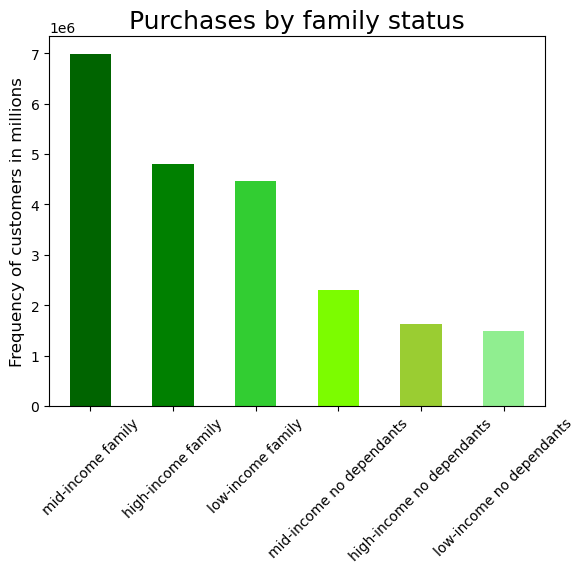

In [44]:
bar_fam_status= df['profile_fam'].value_counts().plot.bar(color = ['darkgreen', 'green', 'limegreen', 'lawngreen', 'yellowgreen', 'lightgreen'])

plt.title("Purchases by family status", fontsize = '18')
plt.ylabel('Frequency of customers in millions', fontsize = 12)
plt.xticks(rotation=45)

**Results:** Married couples with dependants, irrespective of income, account for more purchases than adults with no dependants. 

In [45]:
#checking added column
df.shape

(21675811, 37)

In [46]:
df['dependants_loc'].value_counts(normalize = True)

Has dependants    0.74998
No dependants     0.25002
Name: dependants_loc, dtype: float64

**Results:** we have three times as many customers with dependants as we do without

(array([0, 1]), [Text(0, 0, 'Has dependants'), Text(1, 0, 'No dependants')])

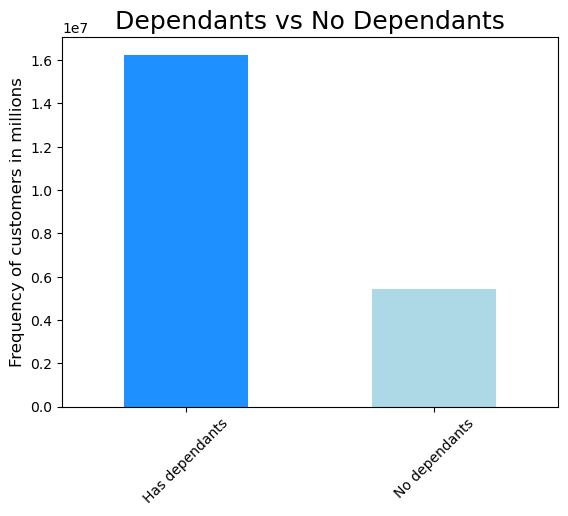

In [47]:
bar_dependants = df['dependants_loc'].value_counts().sort_index().plot.bar(color = ['dodgerblue', 'lightblue'])

plt.title("Dependants vs No Dependants", fontsize = '18')
plt.ylabel('Frequency of customers in millions', fontsize = 12)
plt.xticks(rotation=45)

In [48]:
#exploring relationship between dependants and region
ct_dependants = pd.crosstab(df['region'], df['dependants_loc'], dropna = False)

In [49]:
ct_dependants

dependants_loc,Has dependants,No dependants
region,,
Midwest,3807651,1276416
Northeast,2878220,948589
South,5409261,1807742
West,4161296,1386636


### 3. Customer segmentation by department

##### Looking at various customer purchasing habits

In [50]:
#creating department dictionary
dpt_map = dict(zip(df_deps['department_id'], df_deps['department']))

In [51]:
dpt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [52]:
df['department'] = df['department_id'].map(dpt_map)

In [53]:
df.shape

(21675811, 38)

In [54]:
df['department'].value_counts()

produce            6356619
dairy eggs         3624459
snacks             1936252
beverages          1800791
frozen             1485866
pantry             1247905
bakery              784055
canned goods        707871
deli                702708
dry goods pasta     575326
household           489986
meat seafood        473084
breakfast           469289
personal care       296820
babies              286865
international       178998
alcohol             101077
pets                 65127
missing              45310
other                24033
bulk                 23370
Name: department, dtype: int64

#### 3.1 Alcohol drinkers

In [55]:
#creating non-alcohol drinker column

df.loc[df['department'] !='alcohol', 'alcohol_drinker'] = 'No'
df.loc[df['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [56]:
df['alcohol_drinker'].value_counts(dropna = False)

No     21574734
Yes      101077
Name: alcohol_drinker, dtype: int64

In [57]:
#checking output of df
df.shape

(21675811, 39)

Text(0.5, 1.0, 'Distribution of alcohol-drinkers ')

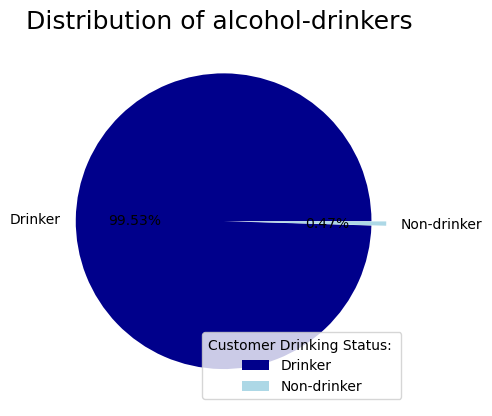

In [58]:
# Drawing a pie chart for alcohol drinking profiling

alcohol_drinker_pie = df['alcohol_drinker'].value_counts().plot.pie(labels = ['Drinker','Non-drinker'], autopct=('%.2f%%'), colors = ['darkblue', 'lightblue'], label = '', explode = [0,0.1])
alcohol_drinker_pie.legend(title = 'Customer Drinking Status: ', loc = 'lower right')
plt.title("Distribution of alcohol-drinkers ", fontsize = '18')


#### 3.2 Pet owners

In [59]:
# Creating pet_owner column

df.loc[df['department'] == 'pets', 'pet_owner'] = 'Yes'
df.loc[df['department'] != 'pets', 'pet_owner'] = 'No'

In [60]:
df.shape

(21675811, 40)

In [61]:
df['pet_owner'].value_counts()

No     21610684
Yes       65127
Name: pet_owner, dtype: int64

Text(0.5, 1.0, 'Distribution of Pet-owners ')

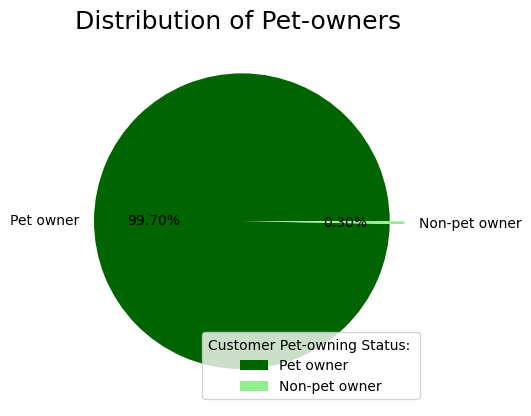

In [62]:
# Drawing a pie chart for pet owners drinking profiling

pie_pet_owner = df['pet_owner'].value_counts().plot.pie(labels = ['Pet owner','Non-pet owner'], autopct=('%.2f%%'), colors = ['darkgreen', 'lightgreen'], label = '', explode = [0,0.1])
pie_pet_owner.legend(title = 'Customer Pet-owning Status: ', loc = 'lower right')
plt.title("Distribution of Pet-owners ", fontsize = '18')

#### 3.3 Order time of Day

In [63]:
#distribution of orders within 24 hours day

df['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      145594
1       76684
2       46038
3       34325
4       35539
5       59118
6      196399
7      604822
8     1162813
9     1654637
10    1854397
11    1831330
12    1746600
13    1776933
14    1797660
15    1774063
16    1688619
17    1387429
18    1085960
19     835952
20     652455
21     533943
22     425446
23     269055
Name: order_hour_of_day, dtype: int64

**Observations:** Unsurprisingly, the most popular hours of the day for purchases are within the typical working day, 9 - 6, although there are also some strong sales before 9 and in the evening.

In [64]:
#create list for new order_time_day column
result = []

for hour in df['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23]:
        result.append('Night owl')
    elif hour in [5, 6, 7, 8]:
        result.append('Early bird')
    else:
        result.append('Regular')

In [65]:
result

['Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Night owl',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 '

In [66]:
df['order_time_period'] = result

In [67]:
#print the frequency of the new column
df['order_time_period'].value_counts(dropna = False)

Regular       14124239
Night owl      5528420
Early bird     2023152
Name: order_time_period, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21675811 entries, 1 to 32404854
Data columns (total 41 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int8          
 9   _merge                  category      
 10  product_name            category      
 11  aisle_id                int16         
 12  department_id           int8          
 13  prices                  float32       
 14  price_range_loc         category      
 15  busiest_days            category      
 16  busiest_period_of_day   category      
 17  max_order               int8          
 18  

In [69]:
df['order_time_period'].value_counts(dropna = False, normalize = True)

Regular       0.651613
Night owl     0.255050
Early bird    0.093337
Name: order_time_period, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Regular'), Text(1, 0, 'Night owl'), Text(2, 0, 'Early bird')])

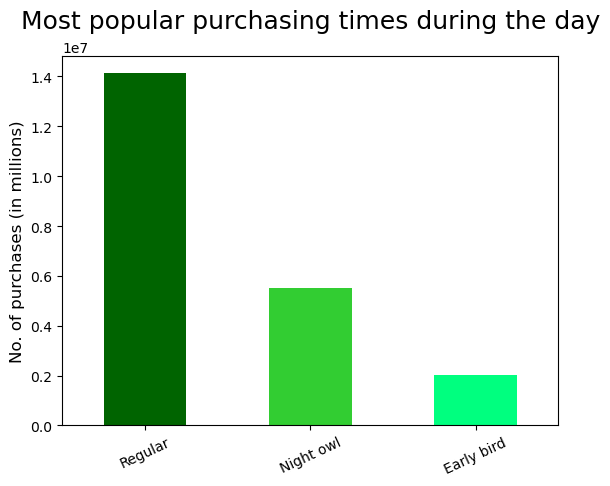

In [70]:
#creating a bar chart for order habit column
bar_loyalty = df['order_time_period'].value_counts().plot.bar(color = ['darkgreen', 'limegreen', 'springgreen'])
plt.title('Most popular purchasing times during the day', fontsize = 18, pad=20)
plt.ylabel('No. of purchases (in millions)', fontsize = 12)
plt.xticks(rotation=25)

#### 3.4 Age and order day of week

In [71]:
#customer comparison by age & day of week
crosstab_age_day = pd.crosstab(df['age_category'], df['orders_day_of_week'], dropna = False)

In [72]:
crosstab_age_day

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle age,1610411,1479751,1107962,1001762,991407,1103719,1178204
Senior,1096232,992095,746509,684482,669182,746599,802637
Youth,1428527,1317616,962977,882271,876982,973377,1023109


In [73]:
#customer comparison by age & day of week
crosstab_age_day2 = pd.crosstab(df['age_category'], df['orders_day_of_week'], dropna = False, normalize = 'index')

In [74]:
crosstab_age_day2

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle age,0.190059,0.174639,0.130761,0.118227,0.117005,0.130260,0.139050
Senior,0.191057,0.172907,0.130105,0.119295,0.116628,0.130121,0.139887
Youth,0.191367,0.176509,0.129001,0.118190,0.117481,0.130395,0.137057


Text(0.5, 0, 'Age Group')

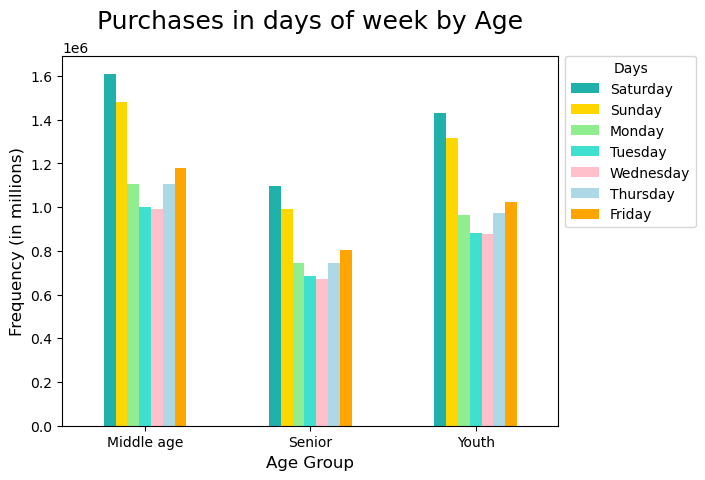

In [75]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'lightgreen', 'turquoise', 'pink', 'lightblue', 'orange'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases in days of week by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

#### 3.5. Region and hour of day 

In [76]:
#customer comparison by region & order hour of day 

crosstab_age_hour = pd.crosstab(df['age_category'], df['order_time_period'], dropna = False)

Text(0.5, 0, 'Age Group')

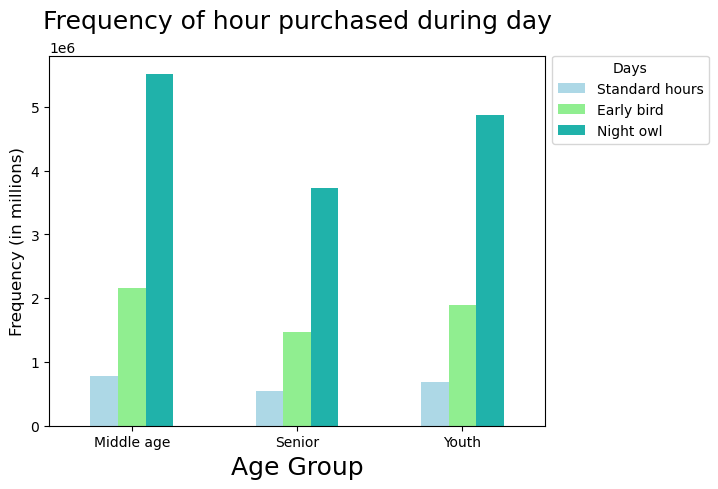

In [77]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_hour.plot(kind = 'bar', rot = 0, color= ['lightblue', 'lightgreen', 'lightseagreen'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Standard hours', 'Early bird', 'Night owl'])
plt.title('Frequency of hour purchased during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 18)

#### Removing two columns which are no longer needed now that 'order_time_period' has been created

## 4. Exporting Dataframe and Visualisations

#### Dataframe

In [79]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_project.pkl'))

#### Visualisations

In [80]:
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_income.02.png'))

In [81]:
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_fam_status.02.png'))

In [82]:
bar_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_dependants.02.png'))

In [83]:
alcohol_drinker_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'alc_pie.02.png'))

In [84]:
bar_age_day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_day.02.png'))

In [86]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty.02.png'))

In [87]:
pie_pet_owner.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_pet.02.png'))